In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
adj_matrix = np.array([
     [0,0,0,1,0,0,0,1,0,1],
     [0,0,1,0,0,1,0,1,0,0],
     [0,1,0,0,0,0,0,0,0,1],
     [1,0,0,0,1,1,0,0,0,0],
     [0,0,0,1,0,0,0,1,0,0],
     [0,1,0,1,0,0,1,0,0,1],
     [0,0,0,0,0,1,0,1,0,1],
     [1,1,0,0,1,0,1,0,1,0],
     [0,0,0,0,0,0,0,1,0,1],
     [1,0,1,0,0,1,1,0,1,0]
])

In [4]:
G = nx.Graph()
node_names = range(adj_matrix.shape[0]) # A.shape[0] gives the number of nodes
G.add_nodes_from(node_names)

In [5]:
for i in range(adj_matrix.shape[0]):
    for j in range(adj_matrix.shape[1]):
        if adj_matrix[i, j] == 1:
            G.add_edge(i, j)

print(G.edges()) 

[(0, 3), (0, 7), (0, 9), (1, 2), (1, 5), (1, 7), (2, 9), (3, 4), (3, 5), (4, 7), (5, 6), (5, 9), (6, 7), (6, 9), (7, 8), (8, 9)]


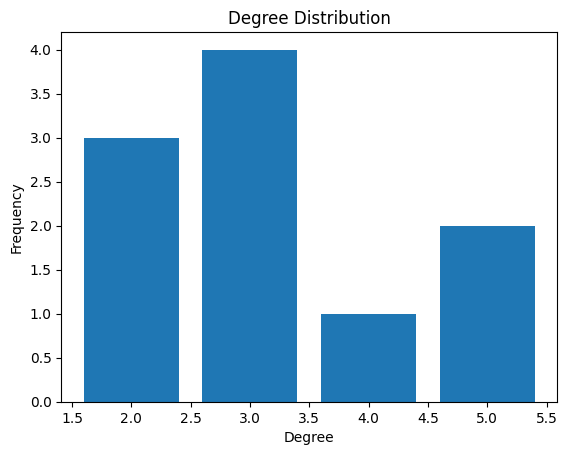

In [6]:
# Q1. Calculate the degree of each node in the graph
degree_sequence = [d for n, d in G.degree()]

# Count the frequency of each degree value
degree_counts = {}
for degree in degree_sequence:
    degree_counts[degree] = degree_counts.get(degree, 0) + 1

# Plot the degree distribution as a graph
plt.bar(degree_counts.keys(), degree_counts.values())
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

In [7]:
#Q5. Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Convert centrality measures to pandas DataFrame for easy manipulation
centrality_df = pd.DataFrame({
    'Degree Centrality': degree_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Closeness Centrality': closeness_centrality
})

# Sort nodes by centrality measures and assign ranks
centrality_df['Degree Rank'] = centrality_df['Degree Centrality'].rank(ascending=False)
centrality_df['Betweenness Rank'] = centrality_df['Betweenness Centrality'].rank(ascending=False)
centrality_df['Closeness Rank'] = centrality_df['Closeness Centrality'].rank(ascending=False)

# Display the centrality measures and ranks
print(centrality_df)

   Degree Centrality  Betweenness Centrality  Closeness Centrality  \
0           0.333333                0.071296              0.600000   
1           0.333333                0.092593              0.600000   
2           0.222222                0.013889              0.500000   
3           0.333333                0.066667              0.529412   
4           0.222222                0.020833              0.500000   
5           0.444444                0.128241              0.642857   
6           0.333333                0.028704              0.600000   
7           0.555556                0.266667              0.692308   
8           0.222222                0.014815              0.529412   
9           0.555556                0.212963              0.642857   

   Degree Rank  Betweenness Rank  Closeness Rank  
0          5.5               5.0             5.0  
1          5.5               4.0             5.0  
2          9.0              10.0             9.5  
3          5.5           

In [8]:
#Q6. Calculate the clustering coefficient of the entire graph
graph_clustering_coefficient = nx.average_clustering(G)

print("Clustering coefficient of the entire graph:", graph_clustering_coefficient)

Clustering coefficient of the entire graph: 0.06


In [9]:
# Calculate the clustering coefficient for individual nodes
node_clustering_coefficients = nx.clustering(G)

# Print the local clustering coefficient of each node
print("Local clustering coefficients of individual nodes:")
for node, cc in node_clustering_coefficients.items():
    print("Node", node, ":", cc)

# Calculate the average of the local clustering coefficients
local_clustering_coefficients = list(node_clustering_coefficients.values())
average_local_clustering_coefficient = sum(local_clustering_coefficients) / len(local_clustering_coefficients)

print("\nAverage local clustering coefficient:", average_local_clustering_coefficient)


Local clustering coefficients of individual nodes:
Node 0 : 0
Node 1 : 0
Node 2 : 0
Node 3 : 0
Node 4 : 0
Node 5 : 0.16666666666666666
Node 6 : 0.3333333333333333
Node 7 : 0
Node 8 : 0
Node 9 : 0.1

Average local clustering coefficient: 0.06


In [10]:
#Q8. Create a graph with 4 nodes
G = nx.DiGraph()
G.add_nodes_from([1, 2, 3, 4])

# Add edges to the graph (replace this with your graph data)
G.add_edges_from([(1, 2), (1,3), (1,4), (2,4), (3,1), (4,3)])

alpha = [1,0.3,0.85,0]
beta = [0,0.3,1,1]

for a,b in zip(alpha, beta):
    # Compute PageRank
    page_rank = nx.pagerank(G, alpha=a)

    # Print PageRank for each node
    print("PageRank for each node: alpha: ", a," beta: ", b)
    for node, rank in page_rank.items():
        print("Node:", node, "PageRank:", rank)


PageRank for each node: alpha:  1  beta:  0
Node: 1 PageRank: 0.33333260221557337
Node: 2 PageRank: 0.11111141117268056
Node: 3 PageRank: 0.33333369598839135
Node: 4 PageRank: 0.22222229062335402
PageRank for each node: alpha:  0.3  beta:  0.3
Node: 1 PageRank: 0.25876513
Node: 2 PageRank: 0.20087667499999998
Node: 3 PageRank: 0.2792185175
Node: 4 PageRank: 0.2611396775
PageRank for each node: alpha:  0.85  beta:  1
Node: 1 PageRank: 0.31409230948584155
Node: 2 PageRank: 0.1264931095706823
Node: 3 PageRank: 0.32540314534572534
Node: 4 PageRank: 0.23401143559775067
PageRank for each node: alpha:  0  beta:  1
Node: 1 PageRank: 0.25
Node: 2 PageRank: 0.25
Node: 3 PageRank: 0.25
Node: 4 PageRank: 0.25


In [11]:
#Q8. PageRank calculation
def custom_pagerank(G, alpha, beta):
    n = len(G)
    if n == 0:
        return {}
    
    # Initialize PageRank values
    pagerank = dict.fromkeys(G, 1.0 / n)

    # Calculate teleportation probability
    teleportation_prob = 1 - alpha

    # Iterate over iterations
    for _ in range(100):
        new_pagerank = {}
        for node in G:
            # Calculate PageRank contribution from inlinks
            rank = sum(pagerank[inlink] / len(G.out_edges(inlink)) for inlink in G.predecessors(node))
            
            # Calculate new PageRank value
            new_pagerank[node] = teleportation_prob / n + alpha * rank + beta

        # Normalize PageRank values
        total_pagerank = sum(new_pagerank.values())
        pagerank = {node: value / total_pagerank for node, value in new_pagerank.items()}

    return pagerank

# Create a graph with 4 nodes
G = nx.DiGraph()
G.add_nodes_from([1, 2, 3, 4])

# Add edges to the graph
G.add_edges_from([(1, 2), (1,3), (1,4), (2,4), (3,1), (4,3)])

alpha_values = [1, 0.3, 0.85, 0]
beta_values = [0, 0.3, 1, 1]

for alpha, beta in zip(alpha_values, beta_values):
    # Compute PageRank with custom alpha and beta values
    page_rank = custom_pagerank(G, alpha=alpha, beta=beta)

    # Print PageRank for each node
    print("PageRank for each node: alpha =", alpha, ", beta =", beta)
    for node, rank in page_rank.items():
        print("Node:", node, "PageRank:", rank)


PageRank for each node: alpha = 1 , beta = 0
Node: 1 PageRank: 0.33333333333333304
Node: 2 PageRank: 0.11111111111111127
Node: 3 PageRank: 0.3333333333333336
Node: 4 PageRank: 0.22222222222222215
PageRank for each node: alpha = 0.3 , beta = 0.3
Node: 1 PageRank: 0.25171554611551344
Node: 2 PageRank: 0.2273507066416142
Node: 3 PageRank: 0.26258067151376524
Node: 4 PageRank: 0.25835307572910704
PageRank for each node: alpha = 0.85 , beta = 1
Node: 1 PageRank: 0.25270984543118913
Node: 2 PageRank: 0.22182022457443407
Node: 3 PageRank: 0.265940267242289
Node: 4 PageRank: 0.25952966275208783
PageRank for each node: alpha = 0 , beta = 1
Node: 1 PageRank: 0.25
Node: 2 PageRank: 0.25
Node: 3 PageRank: 0.25
Node: 4 PageRank: 0.25


In [2]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import LabelEncoder
import pandas as pd


data = {
    'Name': ['Kate', 'Joe', 'Mena', 'Pat', 'Tim', 'Tina'],
    'City': ['Chicago', 'New York', 'New York', 'Chicago', 'Chicago', 'Chicago'],
    'Likes Beyonce': ['Yes', 'No', 'Yes', 'No', 'Yes', 'Yes'],
    'In a relationship': ['No', 'No', 'Yes', 'Yes', 'No', 'Yes'],
    'Age': [23, 36, 43, 19, 20, 54],
    'Number of concerts per year': [8, 4, 20, 2, 14, 7],
    'Bought ticket to see Taylor Swift': ['Yes', 'Yes', 'No', 'No', 'Yes', 'Yes']
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Encode categorical variables using label encoding
label_encoder = LabelEncoder()
for col in ['City', 'Likes Beyonce', 'In a relationship']:
    df[col] = label_encoder.fit_transform(df[col])

# Extract features and target variable
X = df.drop(columns=['Name', 'Bought ticket to see Taylor Swift'])
y = df['Bought ticket to see Taylor Swift']

# Initialize Decision Tree Classifier with entropy as criterion
dt_classifier = DecisionTreeClassifier(criterion='entropy')

# Fit the classifier to the data
dt_classifier.fit(X, y)

# Print the decision tree
tree_text = export_text(dt_classifier, feature_names=list(X.columns))
print(tree_text)


|--- In a relationship <= 0.50
|   |--- class: Yes
|--- In a relationship >  0.50
|   |--- Age <= 48.50
|   |   |--- class: No
|   |--- Age >  48.50
|   |   |--- class: Yes

